# Stock Market Analysis
This analysis project looks at data from the stock market, particulary some technology stocks. Using pandas to get stock information, visualize different aspects of it, and finally will look at a few ways of analyzing the risk of a stock, based on its previous performance history. Will also be predicting future stock prices through a Monte Carlo method.

This analysis will discuss the following questions:
1. What was the change in price of the stock over time?
2. What was the daily return of the stock on average?
3. What was the moving average of the various stocks?
4. What was the correlation between different stocks' closing prices?
5. What was the coreelation between different stocks' daily returns?
6. How much value do we put at risk by investing in a particular stock?
7. How can we attempt to predict future stock behavior?

In [1]:
# for analyzing data
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

# for visaulization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
# for reading stock from yahoo finance
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data as pdr

# since yahoo finance has decommissioned their historical data API, this import can temporary fix the problem
import fix_yahoo_finance as yf

# for time stamps
from datetime import datetime

# for division
from __future__ import division

In [3]:
# ignore the warnings from different version of the packages
import warnings
warnings.filterwarnings('ignore')

In [4]:
# fix the yahoo finance problem
yf.pdr_override()

In [5]:
# set up end and start dates for data extraction
# today's date
end = datetime.now()

# today's date one year ago
start = datetime(end.year-1,end.month,end.day)

In [6]:
# create a list of all the tech stocks used for this analysis
tech_list = ['AAPL','GOOG','MSFT','AMZN']

# for loop for grabing yahoo finance data and setting as individual DataFrame
for stock in tech_list:
    # set DataFrame as the stock ticker
    globals()[stock] = pdr.get_data_yahoo(stock,start,end)

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


### Basic Analysis of Stock Information

In [7]:
# summary stats
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,178.903834,180.402688,177.543123,179.021779,177.666066,3.016811e+07
std,17.280690,17.358979,17.235261,17.345163,17.980494,1.275664e+07
min,149.990005,151.830002,149.160004,150.550003,148.307571,1.251390e+07
25%,168.389999,170.320007,166.759995,168.389999,167.107300,2.093360e+07
50%,174.880005,175.649994,173.800003,175.000000,173.023026,2.642880e+07
75%,188.000000,189.220001,186.910004,188.149994,187.492432,3.633810e+07
max,228.990005,229.669998,226.630005,228.360001,228.360001,8.659380e+07


In [8]:
# general info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2017-09-12 to 2018-09-12
Data columns (total 6 columns):
Open         253 non-null float64
High         253 non-null float64
Low          253 non-null float64
Close        253 non-null float64
Adj Close    253 non-null float64
Volume       253 non-null int64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


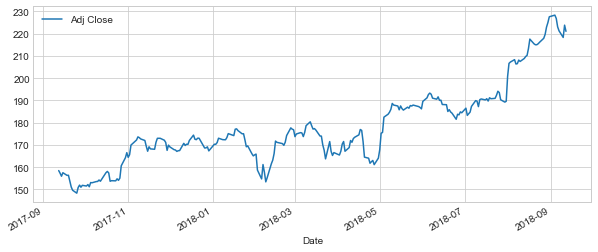

In [9]:
# plot a historical view of the closing price
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

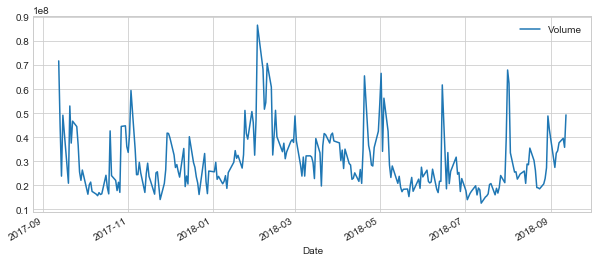

In [10]:
# plot the total volumn of stock being traded each day
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [11]:
# moving average time frame list
ma_day = [10,20,50]

# create new columns to APPL DataFrame according the moving average time frame
for ma in ma_day:
    column_name = 'MA for %s days' %(str(ma))
    AAPL[column_name] = DataFrame.rolling(AAPL['Adj Close'],window=ma).mean()

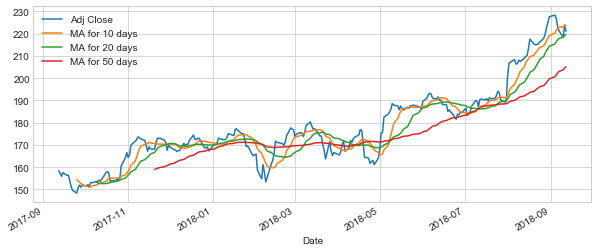

In [12]:
# plot closing price and all the moving averages
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

The moving average for longer period has a smoother line compared with shorter periods.

### Daily Return Analysis

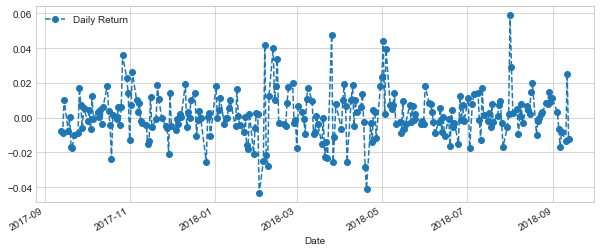

In [13]:
# use pct_change to find the percent change for each day
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

# plot the daily return percentage
AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

Notice the daily return percentage for Apple reached the highest of 0.06% in Auguest 2018, while it reached below -0.04% in Feburary 2018.

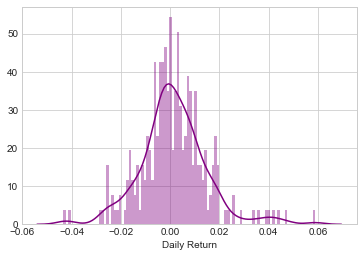

In [14]:
# create both a histogram and kde plot on the same figure
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [15]:
# grab all the closing prices for the tech stock list into one DataFrame
closing_df = pdr.get_data_yahoo(tech_list,start,end)['Adj Close']

[*********************100%***********************]  4 of 4 downloaded


In [16]:
# quick preview of closing_df
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2017-09-12,158.464020,982.580017,932.070007,73.357918
2017-09-13,157.272018,999.599976,935.090027,73.878525
2017-09-14,155.922440,992.210022,925.109985,73.446312
2017-09-15,157.498611,986.789978,920.289978,73.976761
2017-09-18,156.306625,974.190002,915.000000,73.829422


In [17]:
# make a new tech returns DataFrame
tech_ret = closing_df.pct_change()

In [18]:
# quick preview of tech_ret
tech_ret.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2017-09-12,NaN,NaN,NaN,NaN
2017-09-13,-0.007522,0.017322,0.003240,0.007097
2017-09-14,-0.008581,-0.007393,-0.010673,-0.005850
2017-09-15,0.010109,-0.005463,-0.005210,0.007222
2017-09-18,-0.007568,-0.012769,-0.005748,-0.001992


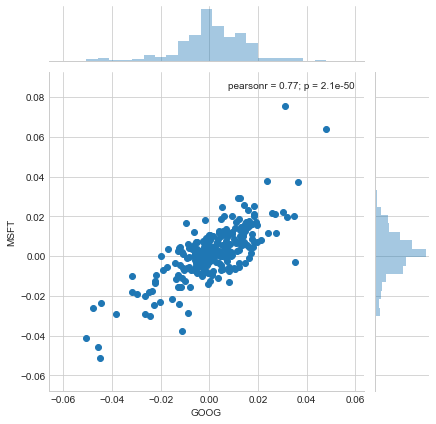

In [19]:
# use jointplot to compare the daily returns of Google and Microsoft
sns.jointplot('GOOG','MSFT',tech_ret,kind='scatter')

The Pearson product-moment correlation coefficient is 0.77, which shows a strong correlation of 
the daily percentage return between Google and Microsoft

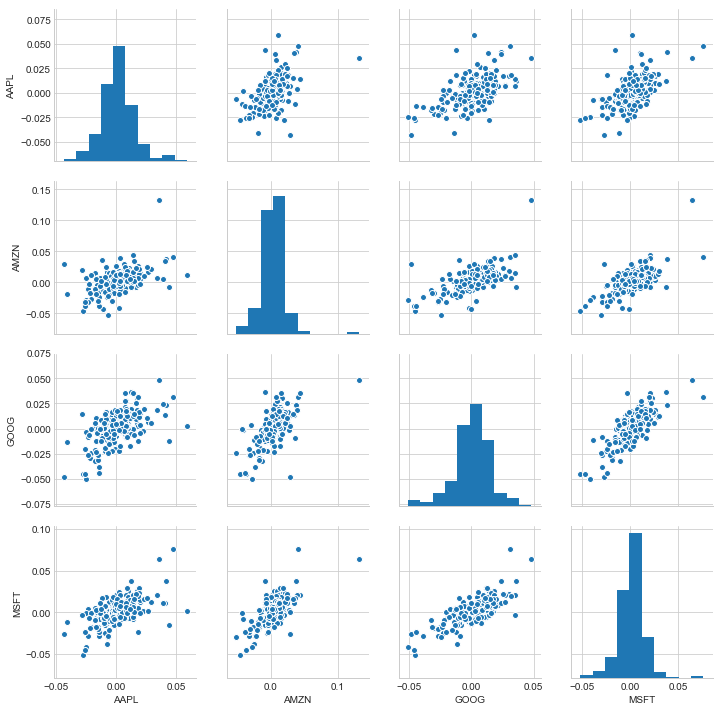

In [20]:
# use seaborn to call pairplot on our DataFrame for an 
# automatic visual analysis of all the comparisons
sns.pairplot(tech_ret.dropna())

All the relationships on daily returns between all the stocks.

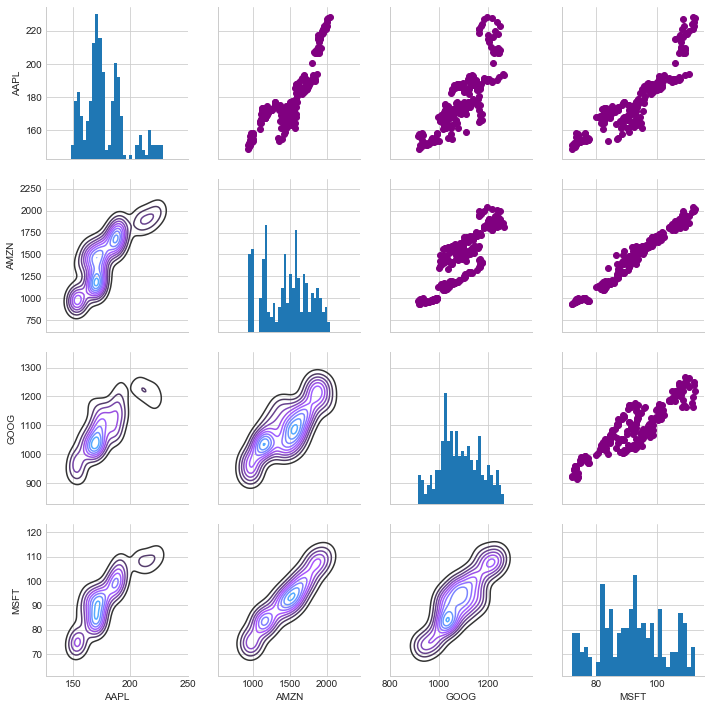

In [21]:
# set up figure by naming it returns_fig, call PairGrid on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# using map_upper to specify what the upper triangle will look like
# including the plot type and color
returns_fig.map_upper(plt.scatter,color='purple')

# can also define the lower triangle in the figure
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# define the diagonal as a series of histogram plots of the closing price
returns_fig.map_diag(plt.hist,bins=30)

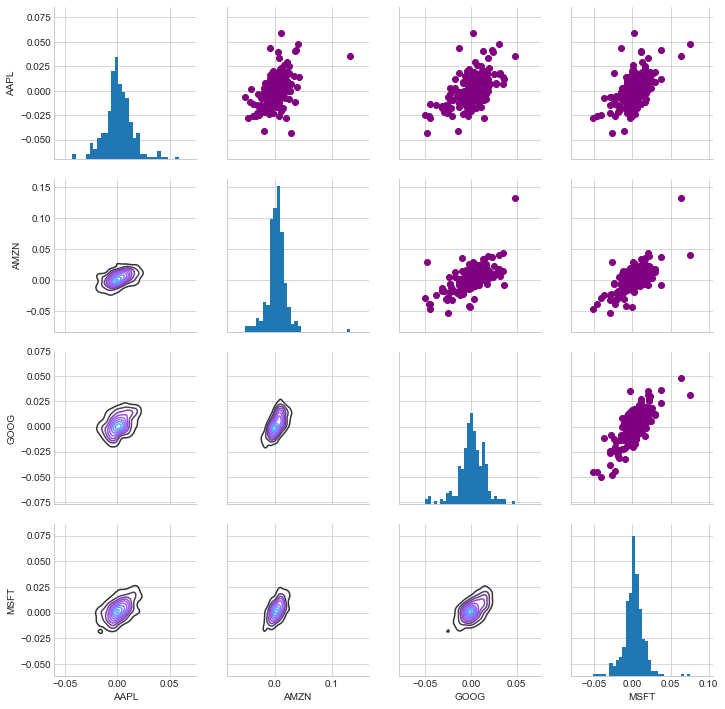

In [22]:
# using the same technique to analyze the correlation of the daily returns

# set up figure by naming it returns_fig, call PairGrid on the DataFrame
returns_fig = sns.PairGrid(tech_ret.dropna())

# using map_upper to specify what the upper triangle will look like
# including the plot type and color
returns_fig.map_upper(plt.scatter,color='purple')

# can also define the lower triangle in the figure
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

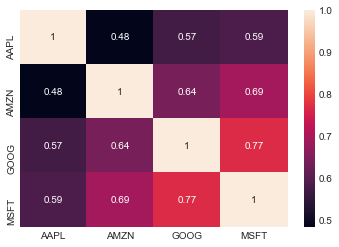

In [23]:
# use seaborn for a quick correlation plot for the daily returns
sns.heatmap(tech_ret.dropna().corr(),annot=True)

Can see numerically and visually that Google and Microsoft have the strongest correlation of daily stock return.

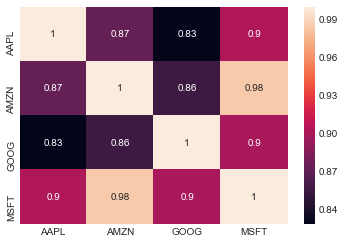

In [24]:
# use seaborn for a quick correlation plot for the closing price
sns.heatmap(closing_df.corr(),annot=True)

Both (Apple and Microsoft) and (Google and Microsoft) have a very strong correlation of daily closing price. All the technology companies in the analysis are positively correlated.

### Risk Analysis
Compare the expected return with the standard deviation of the daily percentage returns.

In [25]:
# define a new DataFrame as a cleaned version of the original tech_ret DataFrame
rets = tech_ret.dropna()

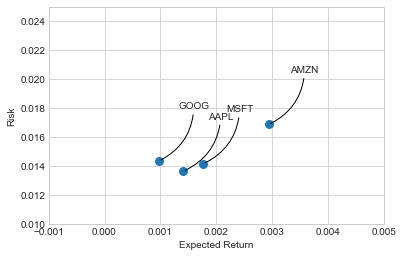

In [26]:
# set the area of the circle of the scatter plot
area = np.pi * 20

# plot the scatter plot by using mean and standrad deviation of the return as x-axis and y-axis respectively
plt.scatter(x=rets.mean(),y=rets.std(),s=area)

# label the axis
plt.xlabel('Expected Return')
plt.ylabel('Risk')

# set the limits of the axis
plt.ylim([0.01,0.025])
plt.xlim([-0.001,0.005])

# label the scatter plots
for label,x,y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

Seems like Amazon is the most risky, but has the most expected return among the four tech stocks. On the other hand, Microsoft have a positive expected return while keeping the risk low compared with the other three stocks.

### Value at Risk
Define a value at risk parameter for the stocks. Treat value at risk as the amount of money we could expect to lose (aka putting at risk) for a given confidence interval. Theres several methods we can use for estimating a value at risk.

#### Value at risk using the "bootstrap" method

Calculate the empirical quantiles from a histogram of daily returns.

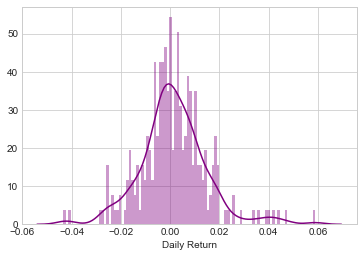

In [27]:
# plot the histogram of Apple's daily return
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [28]:
# preview of the daily return
rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2017-09-13,-0.007522,0.017322,0.003240,0.007097
2017-09-14,-0.008581,-0.007393,-0.010673,-0.005850
2017-09-15,0.010109,-0.005463,-0.005210,0.007222
2017-09-18,-0.007568,-0.012769,-0.005748,-0.001992
2017-09-19,0.000378,-0.004445,0.007443,0.003725


In [29]:
# find the 0.05 empirical quantile of Apple's daily returns
rets['AAPL'].quantile(0.05)

-0.02071853126944225

The 0.05 empirical quantile of daily returns is at -0.0207. That means with 95% confidence, the worst daily loss will
not exceed 2.07%.
If we have 1 million dollar investment in Apple, our daily 5% value at risk is: 0.0207 * 1,000,000 = $20,700.

In [30]:
# find the 0.05 empirical quantile of Amazon's daily returns
rets['AMZN'].quantile(0.05)

-0.023838697518780365

With 95% confidence, the worst daily loss will not exceed 2.38%. If we have 1 million dollar investment in Amazon, our daily 5% value at risk is: 0.0238 * 1,000,000 = $23,800.

In [31]:
# find the 0.05 empirical quantile of Google's daily returns
rets['GOOG'].quantile(0.05)

-0.023978469021764932

With 95% confidence, the worst daily loss will not exceed 2.40%. If we have 1 million dollar investment in Google, our daily 5% value at risk is: 0.0240 * 1,000,000 = $24,000.

In [32]:
# find the 0.05 empirical quantile of Microsoft's daily returns
rets['MSFT'].quantile(0.05)

-0.02227183375308414

With 95% confidence, the worst daily loss will not exceed 2.23%. If we have 1 million dollar investment in Microsoft, our daily 5% value at risk is: 0.0223 * 1,000,000 = $22,300.

After analyzing the empirical quantile of all the stocks, Apple seems to have the lowest value at risk.

#### Value at Risk using the Monte Carlo method
Using the Monte Carlo to run many trials with random market conditions, then calculate portfolio losses for each trial. After this, use the aggregation of all these simulations to establish how risky the stock is.

Geometric Browninan motion: $$\frac{\Delta S}{S} = \mu\Delta t + \sigma \epsilon \sqrt{\Delta t}$$

Where S is the stock price, mu is the expected return, sigma is the standard deviation of the returns, t is the time and epsilon is the random variable.

We can mutiply both sides by the stock price (S) to rearrange the formula and solve for the stock price: $$ \Delta S = S(\mu\Delta t + \sigma \epsilon \sqrt{\Delta t}) $$

The change in the stock price is the current stock price mutiplied by two terms. The first term is known as "drift", which is the average daily return mutiplied by the change of time. The second term is known as "shock", for each time period the stock will "drift" and then experience a "shock" which will randomly push the stock price up or down. By simulating this series of steps of drift and shock thousands of times, we can begin to do a simulation of where we might expect the stock price to be.

In [33]:
# Define the variables

# set up time horizon
days = 365

# delta
dt = 1/days

# mu (drift) from the expected return data from Google
mu = rets.mean()['GOOG']

# volitility of the stock from the std() of the average return
sigma = rets.std()['GOOG']

In [34]:
""" create a function that takes in the starting price, number of days, mu, sigma, 
    and return simulated price array
"""
def stock_monte_carlo(start_price,days,mu,sigma):
    
    # define a price array
    price = np.zeros(days)
    price[0] = start_price
    # define shock and drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # run price array for number of days
    for x in range(1,days):
        
        # calculate shock
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        
        # calculate drift
        drift[x] = mu * dt
        
        # calculate price
        price[x] = price[x-1] + (price[x-1]*(drift[x] + shock[x]))
        
    return price

In [35]:
GOOG.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-09-12,932.590027,933.479980,923.861023,932.070007,932.070007,1134400
2017-09-13,930.659973,937.250000,929.859985,935.090027,935.090027,1102600
2017-09-14,931.250000,932.770020,924.000000,925.109985,925.109985,1397600
2017-09-15,924.659973,926.489990,916.359985,920.289978,920.289978,2505400
2017-09-18,920.010010,922.080017,910.599976,915.000000,915.000000,1306900


Text(0.5,1,'Monte Carol Analysis for Google')

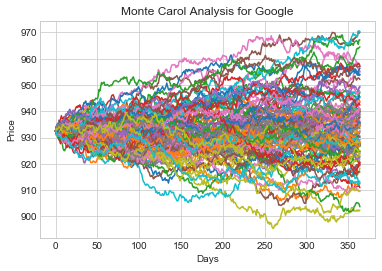

In [36]:
# get start price from Google DataFrame
start_price = 932.59

# plot the simulation
for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

# label the axis and title
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carol Analysis for Google')

In [37]:
# set a larger number of runs
runs = 10000

# create an empty matrix to hold the end price data
simulations = np.zeros(runs)

for run in range(runs):
    # set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5,1,'Final price distribution for Google Stock after 365 days')

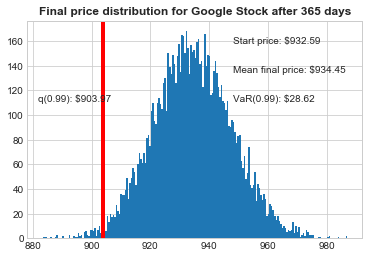

In [38]:
# use quantile to define the risk for this stock

# define q as the 1% empirical quantile, meaning 99% of the values should fall between here
q = np.percentile(simulations,1)

# plot the distribution of the end prices
plt.hist(simulations,bins=200)

# use plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" % start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold')

The 1% empirical quantile of the final price distribution estimates the value at risk for the Google stock, which seems to be $28.24 for every investment of 932.59 dollars (the price of one initial google stock).

This basically means for every initial stock you purchase, you are putting about $28.24 at risk 99% of the time from this Monte Carlo Simulation.